## Задание 1

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('talk')

class Perceptron(object):

    def __init__(self, no_of_inputs, n_epochs=1, learning_rate=0.01):
        self.n_epochs = n_epochs
        self.learning_rate = learning_rate
        self.weights = np.random.randn(no_of_inputs + 1)
           
    def predict(self, inputs):
        summation = inputs @ self.weights[1:] + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.n_epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
                
    def div_line(self):
        return lambda x: (-self.weights[0] - self.weights[1] * x) / self.weights[2]
    
class PerceptronLayer(object):
    
    def __init__(self, n_inputs, n_outputs = 1, n_epochs=1, learning_rate=0.01):
        self.n_outputs = n_outputs
        self.n_epochs = n_epochs
        self.neurons = [Perceptron(n_inputs, n_epochs, learning_rate) for i in range(n_outputs)]
        
    def train(self, training_inputs, labels):
        for i in range(self.n_outputs):
            for _ in range(self.n_epochs):
                for inputs, label in zip(training_inputs, labels[:,i]):
                    prediction = self.neurons[i].predict(inputs)
                    self.neurons[i].weights[1:] += self.neurons[i].learning_rate * (label - prediction) * inputs
                    self.neurons[i].weights[0] += self.neurons[i].learning_rate * (label - prediction)
    
    def predict(self, inputs):
        return np.array([neuron.predict(inputs) for neuron in self.neurons])
    
    def div_lines(self):
        return [neuron.div_line() for neuron in self.neurons]
    
def mae(y_pred,y_true):
    return np.mean(np.abs(y_pred-y_true))

In [12]:
X_1 = np.array([[-1.1, 1.8, 4.8, 1.2, -1.2, 2.5], [-4.3, -1, -1, -3.5, -3.4, 3.7]]).T
Y_1 = np.array([0, 1, 1, 1, 0, 1])

In [5]:
X_2 = np.array([[4.6, -1, -0.3, -1.1, 0.5, 4.9, 0.3, -3.9], 
                [1.7, 4.3, -2.7, 2, 2.5, 4.6, 4.6, -4.5]]).T
Y_2 = np.array([[1, 0, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1]])

### Линейно разделимое множество (x=0); эпох: 2-50 

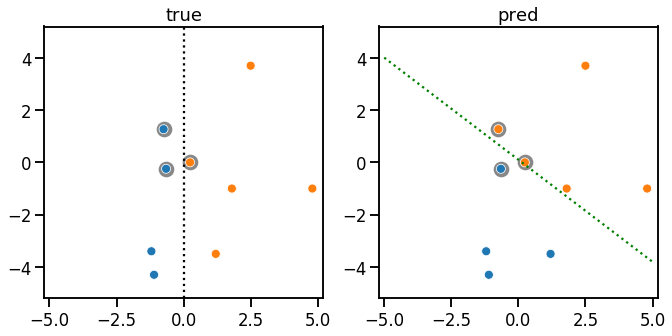

In [4]:
p = Perceptron(X_1.shape[1], n_epochs=2)
p.train(X_1, Y_1)

X_rnd = np.random.randn(3, 2)
X_1_test = np.vstack((X_1, X_rnd))
y_1_test = (X_1_test[:,0] > 0)*1
y_1_pred = [p.predict(x) for x in X_1_test]

fig, ax = plt.subplots(1, 2, figsize=(11, 5))
for i in range(2):
    ax[i].set_xlim((-5.2,5.2))
    ax[i].set_ylim((-5.2, 5.2))
    ax[i].scatter(*X_rnd.T, color='#888888', s=200)
    
sns.scatterplot(*X_1_test.T, hue=y_1_test, legend=False, ax=ax[0])
ax[0].axvline(0, linestyle=':', color='black')
ax[0].set_title('true')

sns.scatterplot(*X_1_test.T, hue=y_1_pred, legend=False, ax=ax[1])
xl = np.linspace(-5, 5, 100)
ax[1].plot(xl, p.div_line()(xl), linestyle=':', color='green')
ax[1].set_title('pred')

plt.show()

In [5]:
mae(y_1_pred, y_1_test)

0.22222222222222221

In [6]:
p.weights

array([-0.14198009,  1.08662591,  1.39110444])

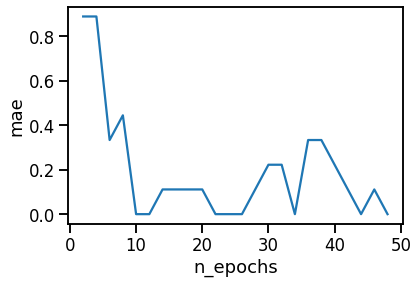

In [7]:
mae_dict = {}
for n in range(2, 50, 2):
    p = Perceptron(X_1.shape[1], n_epochs=n)
    p.train(X_1, Y_1)

    X_rnd = np.random.randn(3, 2)
    X_1_test = np.vstack((X_1, X_rnd))
    y_1_test = (X_1_test[:,0] > 0)*1
    y_1_pred = [p.predict(x) for x in X_1_test]
    mae_dict[n] = mae(y_1_pred, y_1_test)
    
plt.plot(list(mae_dict.keys()), list(mae_dict.values()))
plt.xlabel('n_epochs')
plt.ylabel('mae')
plt.show()

> На таком малом размере обучающей выборки и с помощью одного простейшего перцептрона невозможно добиться стабильно хороших результатов даже за много эпох

### Задание 2

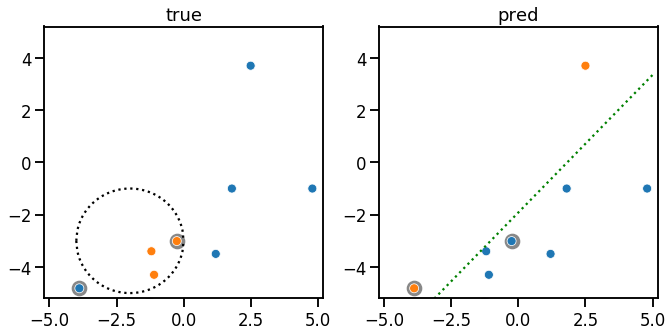

In [18]:
p = Perceptron(X_1.shape[1], n_epochs=2)
p.train(X_1, Y_1)

def circle(x, y):
    return (x+2)**2 + (y+3)**2 <= 2**2

X_rnd = np.random.randn(3, 2)*3
X_1_test = np.vstack((X_1, X_rnd))
y_1_test = (circle(X_1_test[:,0],X_1_test[:,1]))*1
y_1_pred = [p.predict(x) for x in X_1_test]


fig, ax = plt.subplots(1, 2, figsize=(11, 5))
for i in range(2):
    ax[i].set_xlim((-5.2,5.2))
    ax[i].set_ylim((-5.2, 5.2))
    ax[i].scatter(*X_rnd.T, color='#888888', s=200)
    
sns.scatterplot(*X_1_test.T, hue=y_1_test, legend=False, ax=ax[0])
xl = np.linspace(-4, 0, 100)
ax[0].plot(xl, np.sqrt(4 - (xl+2)**2) - 3, linestyle=':', color='black')
ax[0].plot(xl, -np.sqrt(4 - (xl+2)**2) - 3, linestyle=':', color='black')
ax[0].set_title('true')

sns.scatterplot(*X_1_test.T, hue=y_1_pred, legend=False, ax=ax[1])
xl = np.linspace(-5, 5, 100)
ax[1].plot(xl, p.div_line()(xl), linestyle=':', color='green')
ax[1].set_title('pred')

plt.show()

In [19]:
mae(y_1_pred, y_1_test)

0.55555555555555558

> Линейная неразделимость привела к высокой ошибке.

## Задание 3

In [2]:
def yellow(x, y):
    return ((1.5*x - 6.5 < y) & (y < 0.25*x + 4))*1

def cross(x, y):
    return (y < 0.25*x + 1)

In [6]:
p = PerceptronLayer(X_2.shape[1], n_outputs=2, n_epochs=50)
p.train(X_2, Y_2)

In [7]:
X_rnd = np.random.randn(5, 2)*3
X_2_test = np.vstack((X_2, X_rnd))
y_2_test = [yellow(X_2_test[:,0], X_2_test[:,1]), cross(X_2_test[:,0], X_2_test[:,1])]

y_2_pred = np.array([p.predict(x) for x in X_2_test]).T

In [8]:
y_2_pred

array([[1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1]])

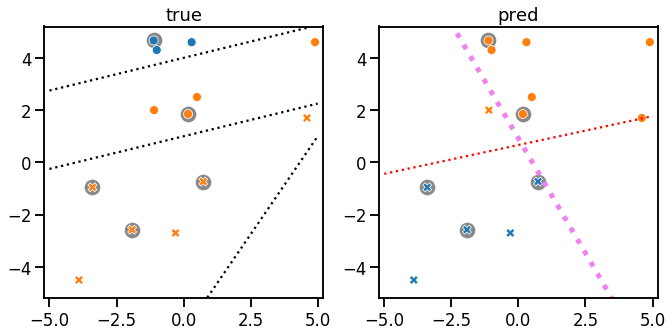

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
for i in range(2):
    ax[i].set_xlim((-5.2,5.2))
    ax[i].set_ylim((-5.2, 5.2))
    ax[i].scatter(*X_rnd.T, color='#888888', s=200)
    
sns.scatterplot(*X_2_test.T, hue=y_2_test[0], style=y_2_test[1], legend=False, ax=ax[0])
xl = np.linspace(-5, 5, 100)

ax[0].plot(xl, 0.25*xl + 4, linestyle=':', color='black')
ax[0].plot(xl, 0.25*xl + 1, linestyle=':', color='black')
ax[0].plot(xl, 1.5*xl - 6.5, linestyle=':', color='black')
ax[0].set_title('true')

sns.scatterplot(*X_2_test.T, hue=y_2_pred[0], style=y_2_pred[1], legend=False, ax=ax[1])
div_lines = p.div_lines()
ax[1].plot(xl, div_lines[0](xl), linestyle=':', color='red')
ax[1].plot(xl, div_lines[1](xl), linestyle=':', color='violet', lw=5)
ax[1].set_title('pred')

plt.show()

In [10]:
mae(y_2_pred, y_2_test)

0.38461538461538464

> С учётом исходных данных невозможно задать полностью линейно-разделимые характеристики, а именно можно разделить так только фигуру, но не цвет. С учётом малого размера выборки обучение всё равно не будет эффективным. 